<a href="https://colab.research.google.com/github/chai1anya/Projects/blob/main/Loan%20Application%20Predictor/Loan_Application_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Importing Libraries

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



### Loading Data Train & Test

In [ ]:
# Reading the loan_train.csv file from the given URL and storing it in a pandas dataframe named loan_data
loan_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv",index_col=False)

# Removing the column named 'Unnamed: 0' from the loan_data dataframe using the drop() method
loan_data = loan_data.drop(['Unnamed: 0'], axis=1)

# Displaying the first few rows of the loan_data dataframe using the head() method
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [ ]:
loan_data.shape

(491, 13)

In [ ]:


test_data.shape



(123, 12)

In [ ]:
loan_data['Loan_Status'].value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [ ]:
# Counting the number of occurrences of each unique value in the 'Loan_Status' column of the 'loan_data' dataframe
# and expressing the results as a proportion (i.e., a percentage) of the total number of rows in the dataframe
loan_data['Loan_Status'].value_counts(normalize=True)


1    0.698574
0    0.301426
Name: Loan_Status, dtype: float64

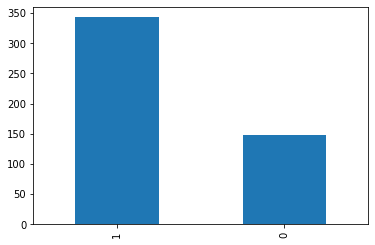

In [ ]:


# Counting the number of occurrences of each unique value in the 'Loan_Status' column of the 'loan_data' dataframe
# and creating a bar plot to visualize the distribution of loan approvals and rejections
loan_data['Loan_Status'].value_counts().plot.bar()




The loan of 343(around 69.85%) people out of 491 were approved.

Now, visualizing each variable separately. Different types of variables are Categorical, ordinal and numerical.

* Categorical features: Gender, Married, Self_Employed, Credit_History, Loan_Status
* Ordinal features: Dependents, Education, Property_Area
* Numerical features: ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term




### Independent Variable (Categorical)

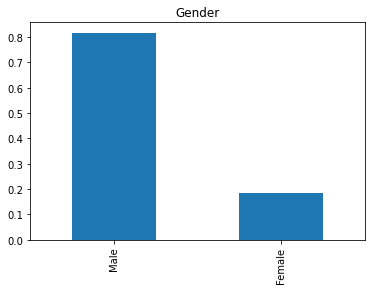

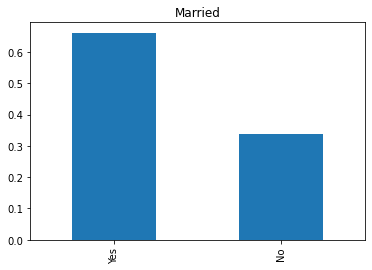

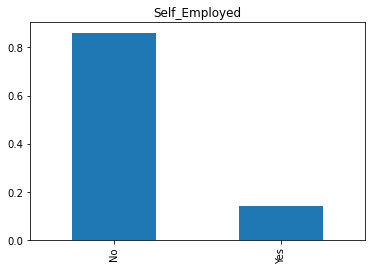

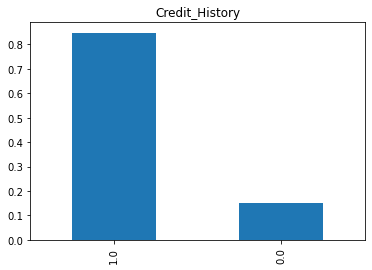

In [ ]:
# Counting the number of occurrences of each unique value in the 'Gender' column of the 'loan_data' dataframe
# and creating a bar plot to visualize the distribution of loan applicants by gender

loan_data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
loan_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
loan_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
loan_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()





It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their doubts.



### Independent Variable (Ordinal)

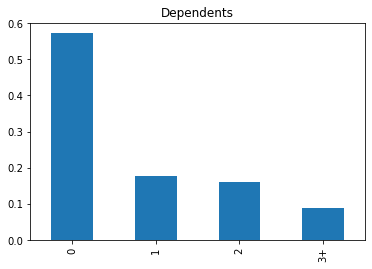

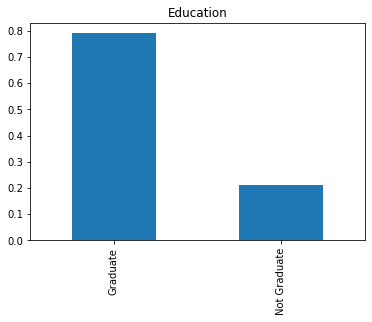

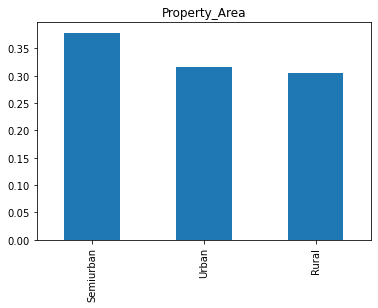

In [ ]:


loan_data['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
loan_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
loan_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()





Following inferences can be made from the above bar plots:
* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.




### Independent Variable (Numerical)

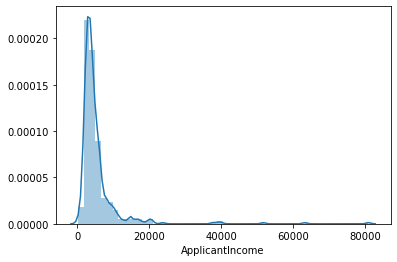

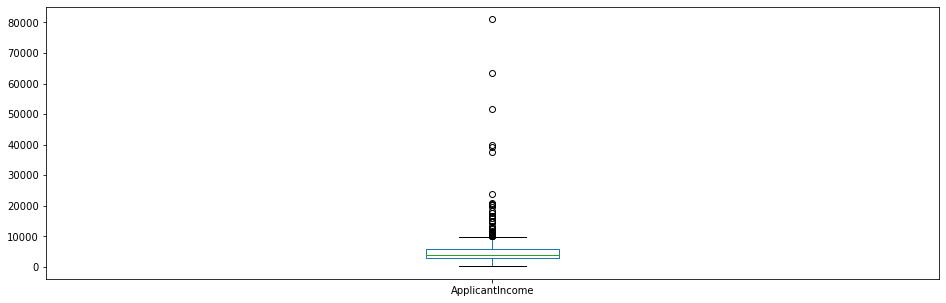

In [ ]:
# Creating a distribution plot to visualize the distribution of applicant incomes in the 'loan_data' dataframe
# using the seaborn library's distplot() function
sns.distplot(loan_data['ApplicantIncome'])
plt.show()

# Creating a box plot to visualize the distribution of applicant incomes in the 'loan_data' dataframe
# using the pandas library's plot.box() function
# and setting the figure size to 16x5 using the figsize parameter
loan_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()




It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.


Text(0.5, 0.98, '')

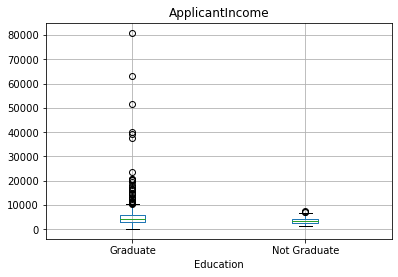

In [ ]:
# Creating a box plot to visualize the distribution of applicant incomes in the 'loan_data' dataframe
# based on the 'Education' column
# using the pandas library's boxplot() function
loan_data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")


It can be seen that there are a higher number of graduates with very high incomes, which are appearing to be outliers.





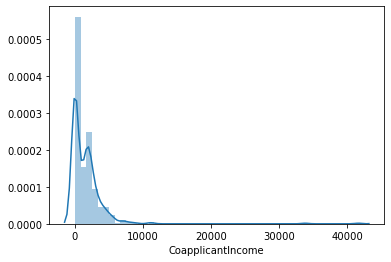

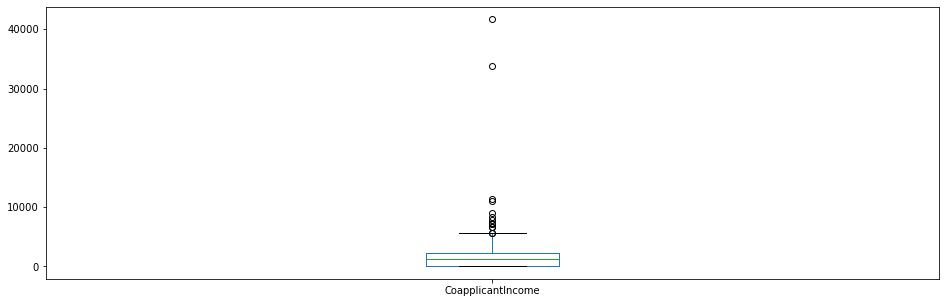

In [ ]:


sns.distplot(loan_data['CoapplicantIncome'])
plt.show()
loan_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()





It has similar distribution as that of the applicant's income.  It can also be seen there are a lot of outliers in the applicant's income and it is not normally distributed.


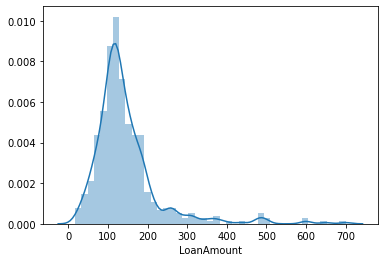

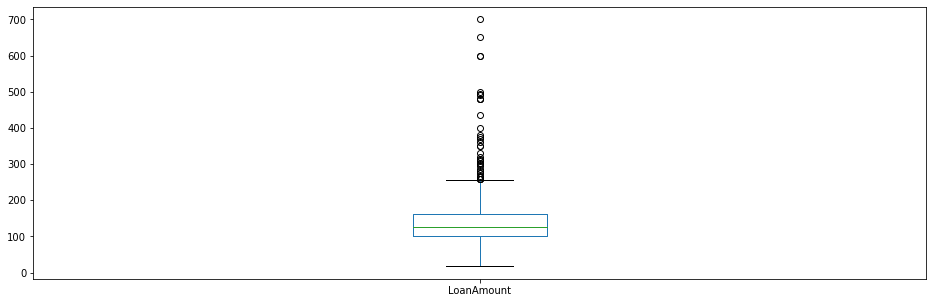

In [ ]:
loan_data.notna()
# train.dropna()
# print(train[train['LoanAmount'].isnull()])
# train['LoanAmount'] = pd.to_numeric(train['LoanAmount'], errors='coerce')
# train = train.dropna(subset=['LoanAmount'])
# train['LoanAmount'] = train['LoanAmount'].astype(int)
sns.distplot(loan_data['LoanAmount'])
plt.show()
loan_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## Bivariate Analysis

### Categorical Independent Variable vs Target Variable

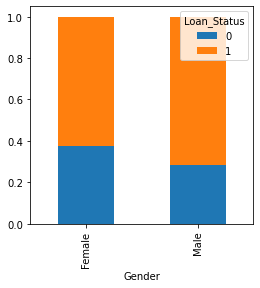

In [ ]:
# Creating a cross-tabulation table to show the number of loan approvals and rejections by gender in the 'loan_data' dataframe
Gender = pd.crosstab(loan_data['Gender'], loan_data['Loan_Status'])

# Dividing each value in the cross-tabulation table by the sum of the row to calculate the percentage of loan approvals and rejections for each gender
# and creating a stacked bar chart to visualize the percentage of loan approvals and rejections by gender
# using the pandas library's div() and plot() functions
Gender.div(Gender.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


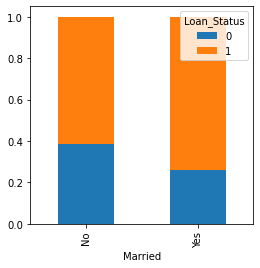

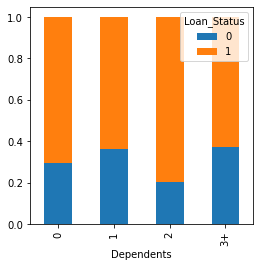

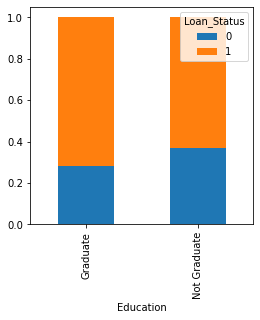

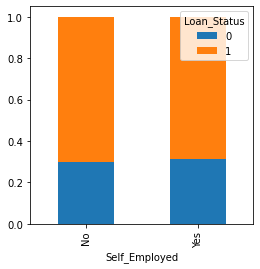

In [ ]:
# Creating cross-tabulation tables to show the number of loan approvals and rejections by various features in the 'loan_data' dataframe
Married = pd.crosstab(loan_data['Married'], loan_data['Loan_Status'])
Dependents = pd.crosstab(loan_data['Dependents'], loan_data['Loan_Status'])
Education = pd.crosstab(loan_data['Education'], loan_data['Loan_Status'])
Self_Employed = pd.crosstab(loan_data['Self_Employed'], loan_data['Loan_Status'])

# Dividing each value in the cross-tabulation tables by the sum of the row to calculate the percentage of loan approvals and rejections for each feature
# and creating stacked bar charts to visualize the percentage of loan approvals and rejections by each feature
# using the pandas library's div() and plot() functions
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


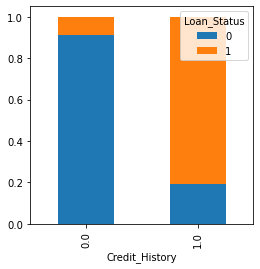

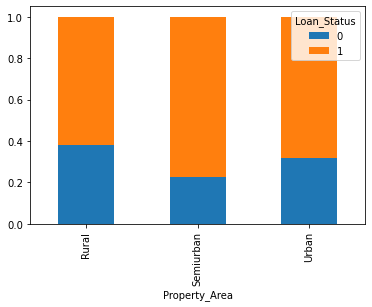

In [ ]:
Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
Property_Area=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

## Numerical Independent Variable vs Target Variable

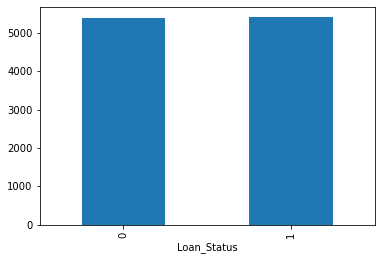

In [ ]:
loan_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

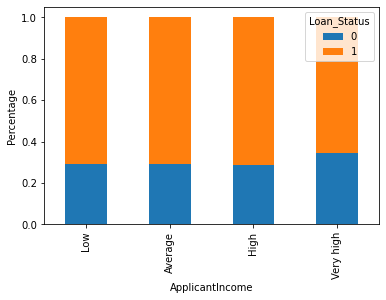

In [ ]:


bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Income_bin']=pd.cut(loan_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')



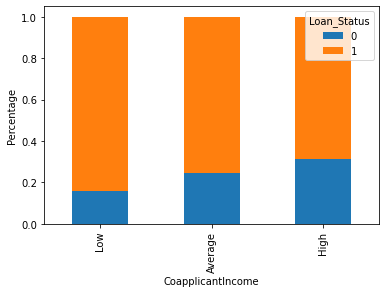

In [ ]:


bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_data['Coapplicant_Income_bin']=pd.cut(loan_data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(loan_data['Coapplicant_Income_bin'],loan_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')



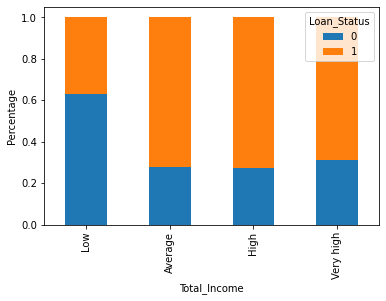

In [ ]:


loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Total_Income_bin']=pd.cut(loan_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(loan_data['Total_Income_bin'],loan_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')



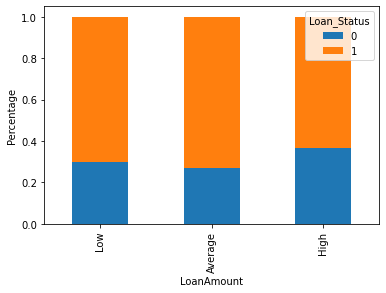

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_data['LoanAmount_bin']=pd.cut(loan_data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(loan_data['LoanAmount_bin'],loan_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [ ]:
# print(train.dtypes)
loan_data=loan_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
loan_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)

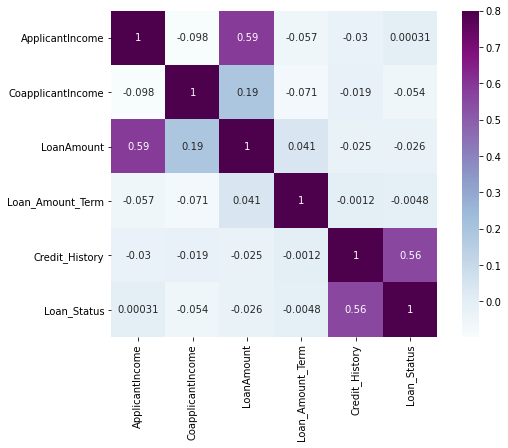

In [ ]:


matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)



## Missing value imputation



In [ ]:


loan_data.isnull().sum()



Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    404
180.0     35
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
36.0       2
60.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

In [ ]:


loan_data.isnull().sum()



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

## Outlier Treatement

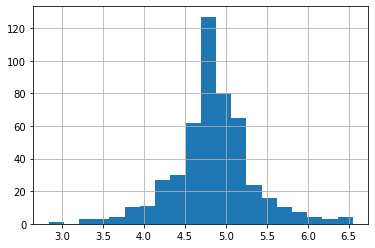

In [ ]:
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])

## Model Building

In [ ]:


loan_data=loan_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)



In [ ]:


X = loan_data.drop('Loan_Status',axis=1)
y = loan_data.Loan_Status



In [ ]:


train = loan_data.copy()
test = test_data.copy()



In [ ]:


X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
model = LogisticRegression()
model.fit(x_train, y_train)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12

LogisticRegression()

In [ ]:


pred_cv = model.predict(x_valid)
print('Model Accuracy = ', accuracy_score(y_valid,pred_cv))
print('Model F1-Score = ', f1_score(y_valid,pred_cv))



Model Accuracy =  0.8783783783783784
Model F1-Score =  0.9217391304347826
